***
## required library

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string
import nltk
import os


# for visualization
plt.style.use('fivethirtyeight')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***
## read the data

In [4]:
# load data by using pandas command [pd.read_csv]
train = pd.read_csv('Train_set.csv')
train

,Unnamed: 0,id,Body,Label
0,4006,83044,"Subject: new jcc stuff vince , i ' m gone thr...",0.0
1,6645,36465,Subject: = ? iso - 8859 - 1 ? q ? automaattine...,1.0
2,13662,30041,Subject: we need your help\n dear southtrust c...,1.0
3,7706,72756,bank accountdoctyp html public wnumbercdtd htm...,1.0
4,10855,54804,Subject: dinner speaker - may 23\n vince :\n m...,0.0
...,...,...,...,...
13148,9225,68399,Subject: re : test dear vince : the email add...,0.0
13149,13123,6407,"Subject: all graphics software available , che...",1.0
13150,9845,56243,Subject: introduction of the european gas advi...,0.0
13151,10799,70202,"Subject: credit business plan hi jeff , my r...",0.0


In [5]:
# load data by using pandas command [pd.read_csv]
test = pd.read_csv('Test_set.csv')
test

,Unnamed: 0,id,Body
0,4934,22406,Subject: i ' m a changed man\n dear sir / mada...
1,8832,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,11742,59875,Subject: ngx - enron - security in place .\n h...
3,1514,40297,Subject: sitara availability\n as a precaution...
4,4431,50696,Subject: inception document for gtv ii phase i...
...,...,...,...
5633,3050,79976,Subject: are you lonely or horney ?\n 100 % fr...
5634,17161,53867,Subject: career opportunity dear mr . kaminsk...
5635,17696,50221,Subject: abb on eol\n calpine and nrg risk man...
5636,1615,64131,bad focusclick behaviourtoni nugent sender dat...


### a littel visualization before the process

Text(0.5, 1.0, 'WordCloud for train ')

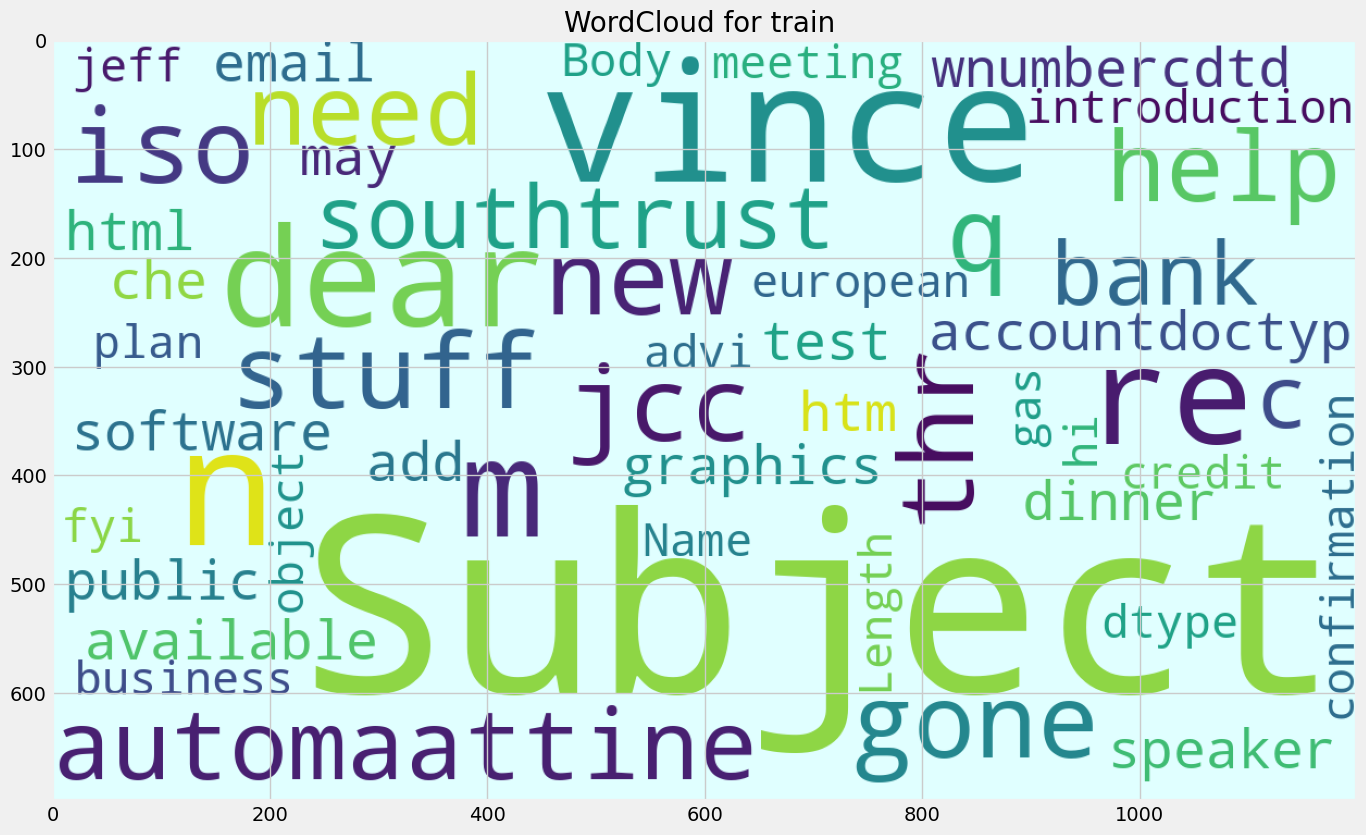

In [6]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

Text(0.5, 1.0, 'WordCloud for test_edit ')

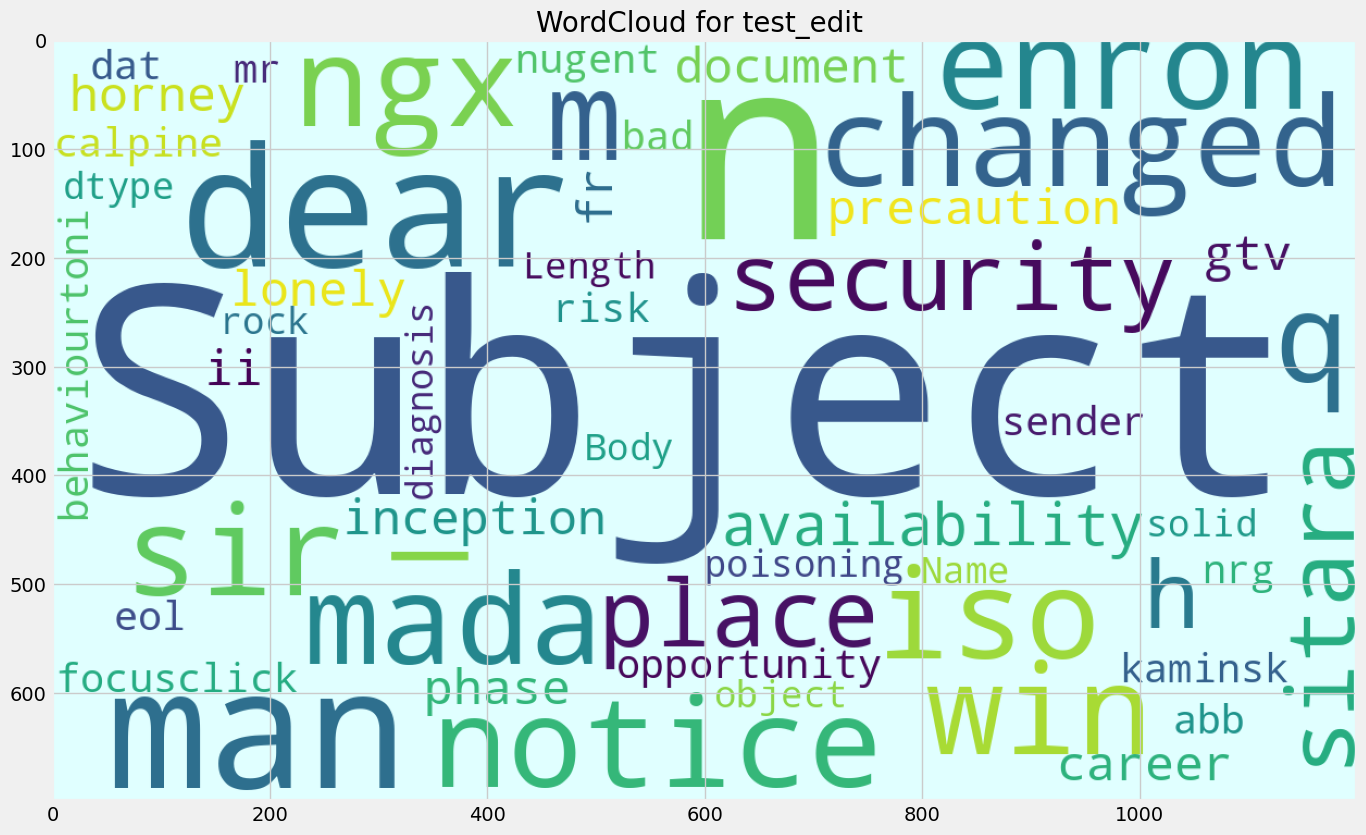

In [7]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

***
### Drop the unnecessary data

In [8]:
train = train.drop(columns=['Unnamed: 0','id'])

In [9]:
test = test.drop(columns=['Unnamed: 0'])
test

,id,Body
0,22406,Subject: i ' m a changed man\n dear sir / mada...
1,19495,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,59875,Subject: ngx - enron - security in place .\n h...
3,40297,Subject: sitara availability\n as a precaution...
4,50696,Subject: inception document for gtv ii phase i...
...,...,...
5633,79976,Subject: are you lonely or horney ?\n 100 % fr...
5634,53867,Subject: career opportunity dear mr . kaminsk...
5635,50221,Subject: abb on eol\n calpine and nrg risk man...
5636,64131,bad focusclick behaviourtoni nugent sender dat...


In [10]:
test_edit = test.drop(columns=['id'])

In [11]:
test_edit

,Body
0,Subject: i ' m a changed man\n dear sir / mada...
1,Subject: = ? iso - 8859 - 1 ? q ? win _ notice...
2,Subject: ngx - enron - security in place .\n h...
3,Subject: sitara availability\n as a precaution...
4,Subject: inception document for gtv ii phase i...
...,...
5633,Subject: are you lonely or horney ?\n 100 % fr...
5634,Subject: career opportunity dear mr . kaminsk...
5635,Subject: abb on eol\n calpine and nrg risk man...
5636,bad focusclick behaviourtoni nugent sender dat...


***
## 1. Text Preprocessing

In [12]:
train['Body'].isnull().sum()

0

In [16]:
# Load spaCy's English tokenizer and tagger
nlp = spacy.load("en_core_web_sm")

In [107]:
def preprocess_text(text):
    # Tokenize the text using NLTK's word_tokenize
    text = text.replace('\n', ' ')
    words = word_tokenize(text)

    # Lemmatize using spaCy
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]

    # Filter out words that start with "subject" or are in stop words, punctuation, etc.
    words = [word for word in lemmatized_words if not word.lower().startswith("subject")]
    words = [word for word in words if word.lower() != "re" and word.lower() != "'re"]
    words = [word for word in words if not word.startswith("http")]
    #words = [word for word in words if not word.isdigit()]
    words = [word for word in words if word not in string.punctuation]
    words = [word for word in words if word.lower() not in stop_words]

    # Join the preprocessed words back into a text
    preprocessed_text = ' '.join(words)
    return preprocessed_text


### apply the preprocessing in training and testing

In [ ]:
train['Body'] = train['Body'].apply(preprocess_text)

In [ ]:
train['Body']

In [ ]:
train_without_digits = train['Body']

# Save the selected column to a CSV file
train_without_digits.to_csv('train_without_digits.csv', index=False)

In [ ]:
test_edit['Body'] = test_edit['Body'].apply(preprocess_text)

In [ ]:
test_edit['Body']

In [ ]:
test_edit_without_digits = test_edit['Body']

# Save the selected column to a CSV file
test_edit_without_digits.to_csv('test_edit_without_digits.csv', index=False)

***
### plotting the most frequent words

In [ ]:
# wordcloud


wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(train['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for train ", fontsize = 20)

In [ ]:
wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(test_edit['Body']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud for test_edit ", fontsize = 20)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for train')

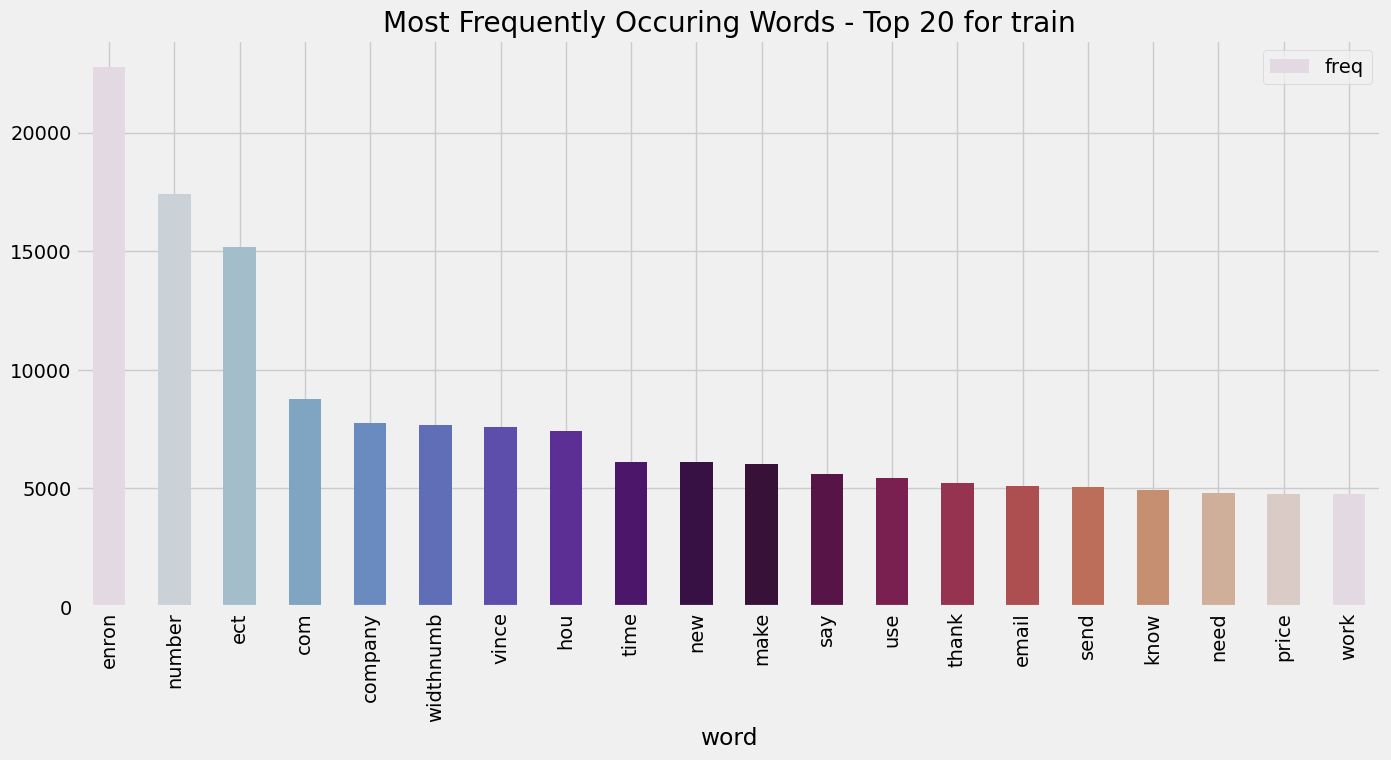

In [30]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 for test_edit')

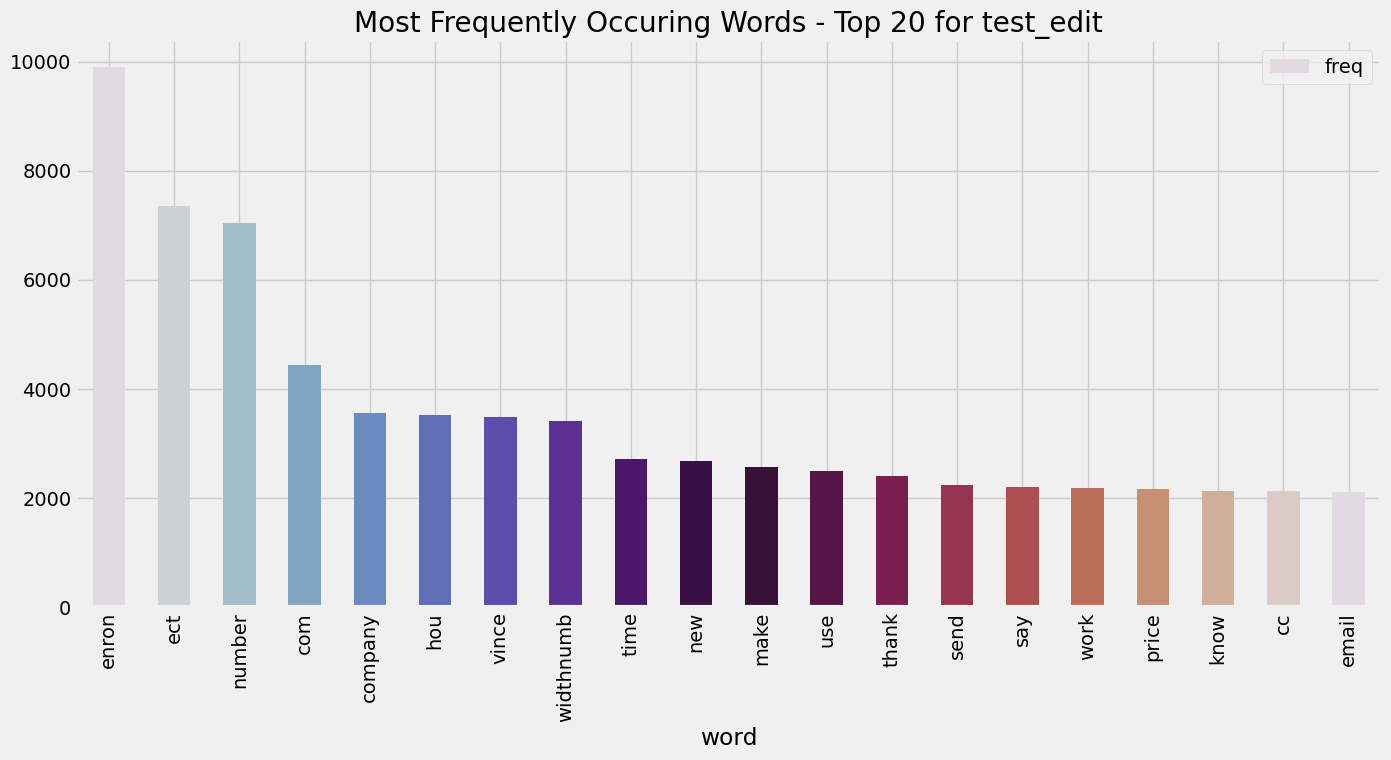

In [31]:


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 for test_edit")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 train')

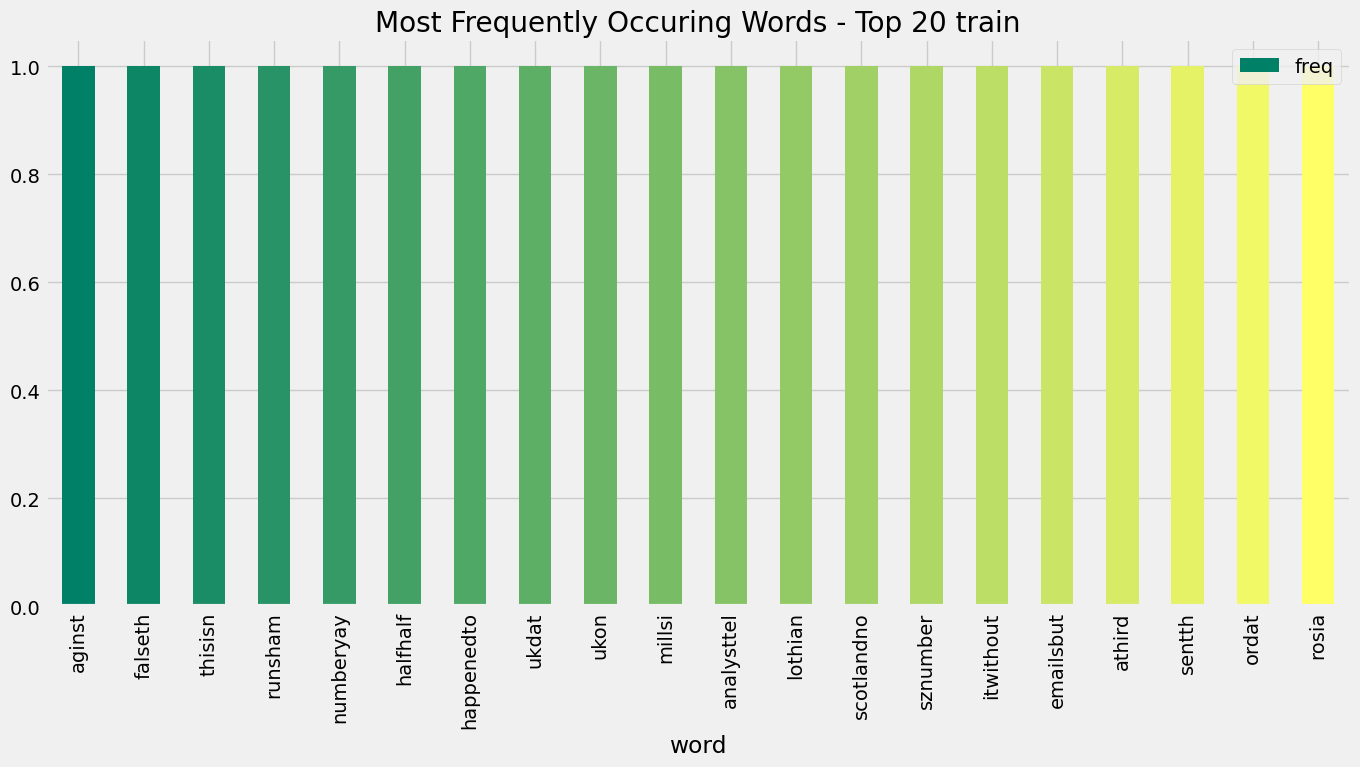

In [32]:

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 train")

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20 test_edit')

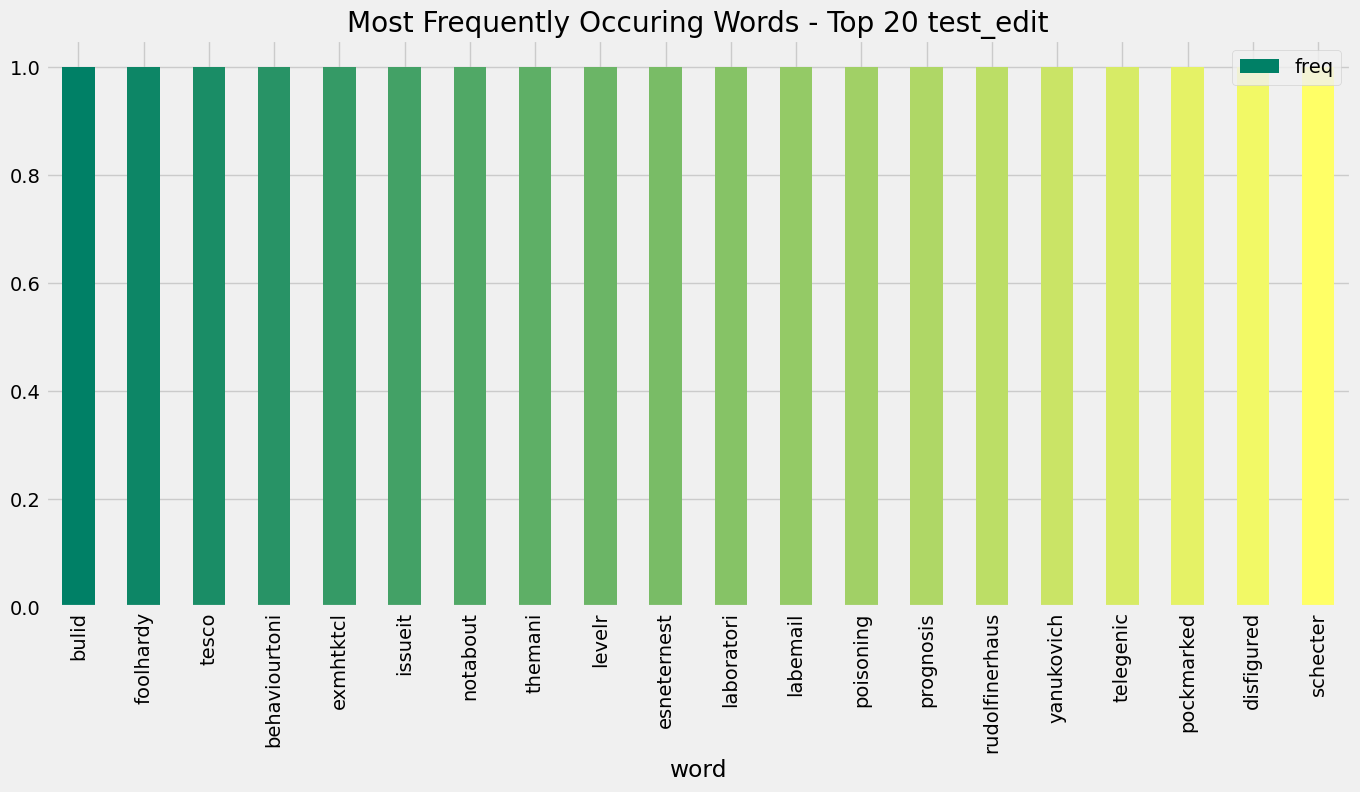

In [33]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test_edit['Body'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.summer(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20 test_edit")

***
### apply the vectorizer


In [34]:
vectorizer  = TfidfVectorizer(max_features = 5000,
                            max_df=0.8,
                            min_df=5,
                            ngram_range=(1,3))

In [35]:
vectors = vectorizer.fit_transform(train['Body'])

In [36]:
vectors_test = vectorizer.transform(test_edit['Body'])

In [37]:
feature_names = vectorizer.get_feature_names_out()

In [38]:
dense = vectors.todense()
denselist = dense.tolist()

In [39]:
dense_test = vectors_test.todense()
denselist_test = dense_test.tolist()

In [ ]:
all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word >0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords.append(keywords)

In [ ]:
print(all_keywords[0])

In [ ]:
print(train['Body'][0])

In [ ]:
all_keywords_test = []

for description in denselist_test:
    x=0
    keywords = []
    for word in description:
        if word >0:
            keywords.append(feature_names[x])
        x = x + 1
    all_keywords_test.append(keywords)

In [ ]:
print(all_keywords_test[0])

In [ ]:
print(test_edit['Body'][0])

## new model

In [93]:


# Initialize Mini-Batch K-Means
num_clusters = 2 # Number of clusters you want to create
batch_size = 250  # Batch size for updating cluster centers
kmeans = MiniBatchKMeans(n_clusters=num_clusters, batch_size=batch_size, random_state=42, n_init='auto')

# Fit the model to your selected features
kmeans.fit(vectors)

# Predict cluster assignments for the data points
cluster_assignments = kmeans.predict(vectors)

# Calculate silhouette score (a measure of cluster quality)
silhouette_avg = silhouette_score(vectors, cluster_assignments)
print("Silhouette Score:", silhouette_avg)



Silhouette Score: 0.008582426181714401



### Confusion Matrix and precision for each label:


In [94]:


y=train['Label']
print(confusion_matrix(y,cluster_assignments))
print("Precision : ", precision_score(y,cluster_assignments,average=None))



[[7580  820]
 [ 305 4448]]
Precision :  [0.96131896 0.8443432 ]


## Modeling

In [ ]:
# true_k = 2

# model = KMeans(n_clusters=true_k,
#               init="k-means++",
#               max_iter=300,
#               n_init=1)

In [ ]:
# model.fit(vectors)

In [ ]:
# order_centroids = model.cluster_centers_.argsort()[:,::-1]

In [ ]:
# terms = vectorizer.get_feature_names_out()

   ### lets see the overlap words

In [ ]:
# with open("trc_results.txt", "w",encoding="utf-8") as f:
#     for i in  range(true_k):
#         f.write(f"Cluster{i}")
#         f.write('\n')a
#         for ind in order_centroids[i,:10]:
#             f.write('%s' % terms[ind],)
#             f.write("\n")
#         f.write("\n")
#         f.write("\n")

## Predict

In [95]:
kmean_indices = kmeans.fit_predict(vectors)

In [96]:
train['cluster']=kmean_indices

In [97]:
train['cluster'].value_counts()

0    7885
1    5268
Name: cluster, dtype: int64

In [98]:
train['Label'].value_counts()

0.0    8400
1.0    4753
Name: Label, dtype: int64

In [99]:
y_true = train['Label']

In [100]:
from sklearn.metrics import precision_score
precision_score(y_true, kmean_indices)

0.8443432042520881

In [101]:
print(confusion_matrix(y_true,kmean_indices))
print("Precision : ", precision_score(y_true,kmean_indices,average=None))


[[7580  820]
 [ 305 4448]]
Precision :  [0.96131896 0.8443432 ]


## for test

In [102]:
y_test_pred = kmeans.predict(vectors_test)

In [103]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['id'] = test['id']
submission['Label'] =y_test_pred # our model predictions on the test dataset
submission

,id,Label
0,22406,1
1,19495,0
2,59875,0
3,40297,0
4,50696,0
...,...,...
5633,79976,1
5634,53867,0
5635,50221,0
5636,64131,0


In [104]:
submission.to_csv('eman_try_batchsize_tune6_submission.csv', index=False)